In [46]:
# manual dec tree reg
import numpy as np

# CHANGE
x = np.array([0.2, 0.7, 1.8, 2.2, 3.7, 4.1, 4.5, 5.1, 6.3, 7.4])
y = np.array([2.1, 1.5, 5.8, 6.1, 9.1, 9.5, 9.8, 12.7, 13.8, 15.9])
threshold = 2.95000005
# CHANGE

thresholds = {
    'depth1': 2.95,    
    # 'left_depth2': 1.5,       
    # 'right_depth2': 4.3    
}



# DEPTH 1

# get mean & mse for root (d1)
mean_y = np.mean(y)
print(f"root mean: {mean_y}")
mse_root = np.mean((y - mean_y)**2)
print(f"root mse: {mse_root:.3f}\n")

# split at defined threshold (root -> l,r)
left_mask = x <= threshold
right_mask = x > threshold
x_left, y_left = x[left_mask], y[left_mask]
x_right, y_right = x[right_mask], y[right_mask]

# get mean & mse (l,r)
pred_left = np.mean(y_left)
pred_right = np.mean(y_right)
print(f"left mean (d1): {pred_left:.3f}")
print(f"right mean (d1): {pred_right:.3f}")
mse_left = np.mean((y_left - pred_left)**2)
mse_right = np.mean((y_right - pred_right)**2)
print(f"left mse (d1): {mse_left:.3f}")
print(f"right mse (d1): {mse_right:.3f}")

# overall mse (d1)
n_total = len(y)
n_left = len(y_left)
n_right = len(y_right)
mse_depth1 = (n_left / n_total) * mse_left + (n_right / n_total) * mse_right
print(f"overall mse (d1): {mse_depth1}\n")



# DEPTH 2

# split at defined threshold (l -> ll,lr)
left_left_mask = x_left <= thresholds['left_depth2']
left_right_mask = x_left > thresholds['left_depth2']
x_ll, y_ll = x_left[left_left_mask], y_left[left_left_mask]
x_lr, y_lr = x_left[left_right_mask], y_left[left_right_mask]

# get mean & mse (ll,lr)
pred_ll = np.mean(y_ll) if len(y_ll) > 0 else 0
pred_lr = np.mean(y_lr) if len(y_lr) > 0 else 0
print(f"left-left mean (d2): {pred_ll:.3f}")
print(f"left_right mean (d2): {pred_lr:.3f}")
mse_ll = np.mean((y_ll - pred_ll)**2) if len(y_ll) > 0 else 0
mse_lr = np.mean((y_lr - pred_lr)**2) if len(y_lr) > 0 else 0
print(f"left-left mse (d2): {mse_ll:.3f}")
print(f"left_right mse (d2): {mse_lr:.3f}")

# split at defined threshold (r -> rl,rr)
right_left_mask = x_right <= thresholds['right_depth2']
right_right_mask = x_right > thresholds['right_depth2']
x_rl, y_rl = x_right[right_left_mask], y_right[right_left_mask]
x_rr, y_rr = x_right[right_right_mask], y_right[right_right_mask]

# get mean & mse (rl,rr)
pred_rl = np.mean(y_rl) if len(y_rl) > 0 else 0
pred_rr = np.mean(y_rr) if len(y_rr) > 0 else 0
print(f"right-left mean (d2): {pred_rl:.3f}")
print(f"right_right mean (d2): {pred_rr:.3f}")
mse_rl = np.mean((y_rl - pred_rl)**2) if len(y_rl) > 0 else 0
mse_rr = np.mean((y_rr - pred_rr)**2) if len(y_rr) > 0 else 0
print(f"right-left mse (d2): {mse_rl:.3f}")
print(f"right_right mse (d2): {mse_rr:.3f}")

mse_depth2 = (len(y_ll)/n_total) * mse_ll + (len(y_lr)/n_total) * mse_lr + \
             (len(y_rl)/n_total) * mse_rl + (len(y_rr)/n_total) * mse_rr
print(f"overall mse (d2): {mse_depth2}\n")

# Summary
print("="*60)
print("SUMMARY")
print("="*60)
print(f"MSE at depth 0 (root): {mse_root:.3f}")
print(f"MSE at depth 1: {mse_depth1:.3f}")
print(f"MSE at depth 2: {mse_depth2:.3f}")

root mean: 8.63
root mse: 20.638

left mean (d1): 3.875
right mean (d1): 11.800
left mse (d1): 4.362
right mse (d1): 6.367
overall mse (d1): 5.56475



KeyError: 'left_depth2'

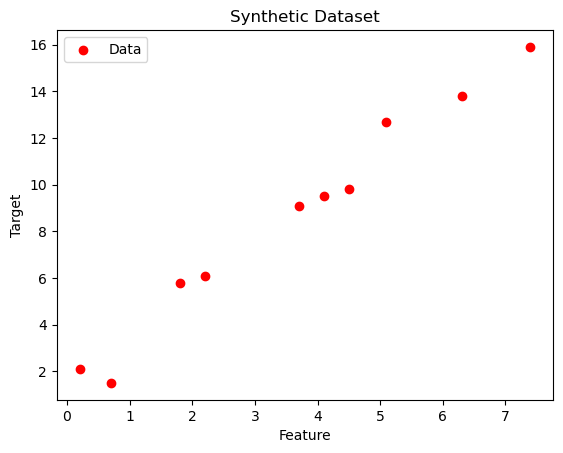

In [ ]:
# verify with scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

x = np.array([0.2, 0.7, 1.8, 2.2, 3.7, 4.1, 4.5, 5.1, 6.3, 7.4])
y = np.array([2.1, 1.5, 5.8, 6.1, 9.1, 9.5, 9.8, 12.7, 13.8, 15.9])

plt.scatter(x, y, color='red', label='Data')
plt.title("Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [35]:
regressor = DecisionTreeRegressor(max_depth=1)
regressor.fit(x.reshape(-1,1), y)
y_pred = regressor.predict(x.reshape(-1,1))
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 5.5648


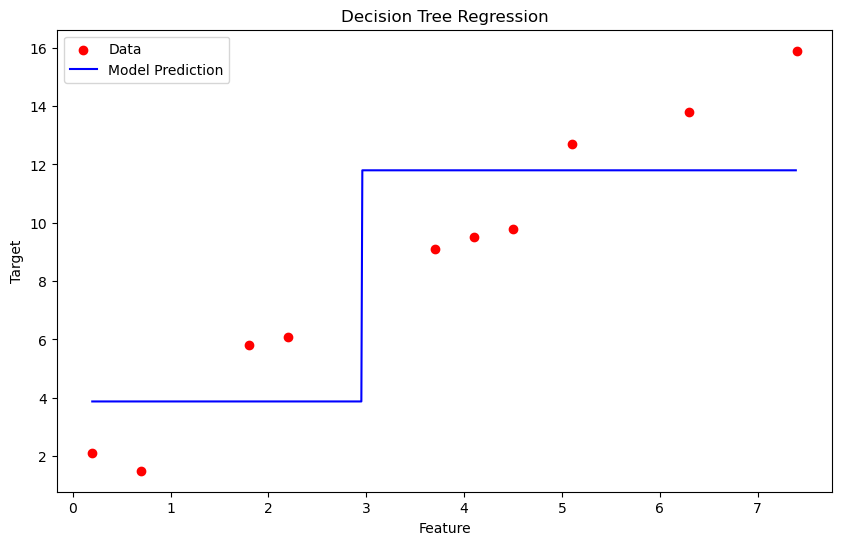

In [36]:
X_grid = np.arange(min(x), max(x), 0.01)[:, np.newaxis]
y_grid_pred = regressor.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Data')
plt.plot(X_grid, y_grid_pred, color='blue', label='Model Prediction')
plt.title("Decision Tree Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

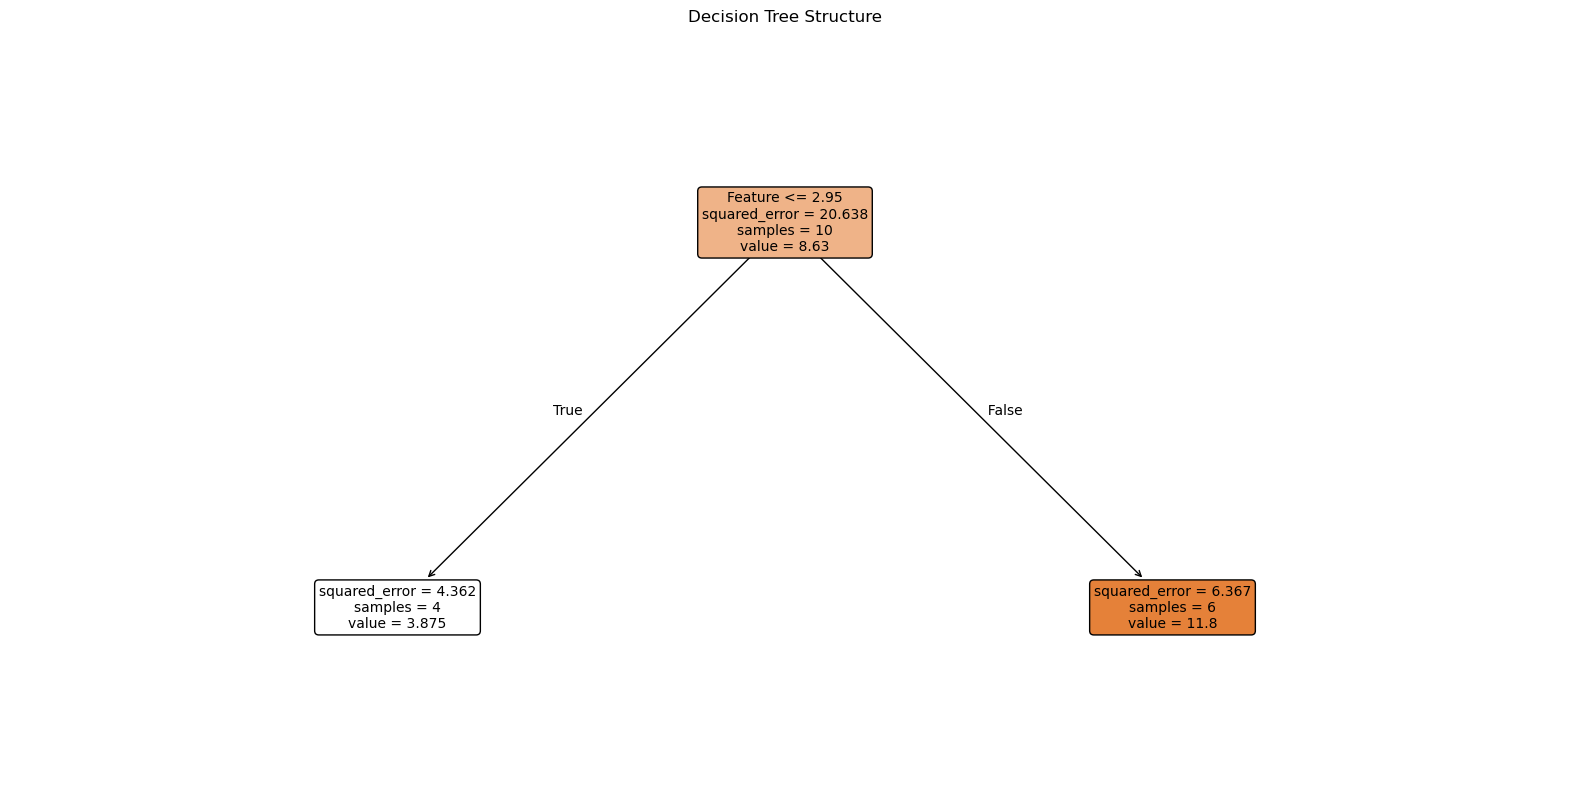

[ 2.95000005 -2.         -2.        ]
[ 0 -2 -2]


In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    regressor,
    feature_names=["Feature"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()